In [10]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [29]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from moviepy.editor import VideoFileClip
from collections import deque

%matplotlib inline

1. Camera Calibration
===
The first step to detect lane line efficiently is to calibrate camera and then remove any distortion from the images after calculating the camera calibration matrix and distortion coefficients using a series of chessboard images.

In [36]:
def tranformImageColor(image, color_space): 
    return cv2.cvtColor(image, color_space)

def calibrateCamera(image, read=True):
    if read:
        img = cv2.imread(image)
        
    # Identify image size
    img_size = (image.shape[1], image.shape[0])
    
    # Calculate calbration matrix
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)
    
    return ret, mtx, dist, rvecs, tvecs

def identifyChessboardCorners(img, gray, iname, pattern_size):
     # Find chessboard corners
    origin_img = mpimg.imread(iname)
    found, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    if found: 
        obj_points.append(objp)
        img_points.append(corners)
            
        #Calibrate
        ret, mtx, dist, rvecs, tvecs = calibrateCamera(img, False)
        img = cv2.undistort(img, mtx, dist, None, mtx)
    
        # Draw chessboard corners
        gray1 = tranformImageColor(img, cv2.COLOR_BGR2GRAY)
        found, corners1= cv2.findChessboardCorners(gray1, pattern_size, None)
        cv2.drawChessboardCorners(img, pattern_size, corners1, found)
        cv2.drawChessboardCorners(origin_img, pattern_size, corners, found)
           
        # Visualize chessboard image with corners
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
        ax1.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original' + '\n' + iname, fontsize=12)
        ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax2.set_title('Corners identified' + '\n' + iname, fontsize=12)

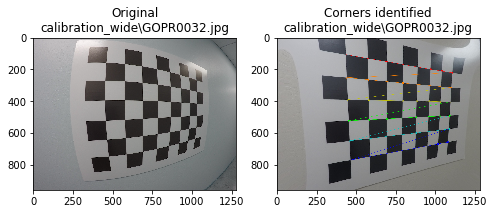

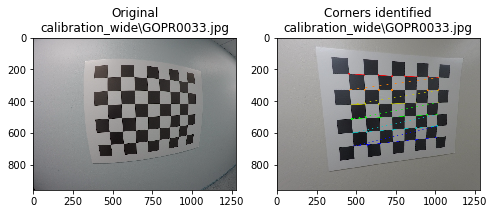

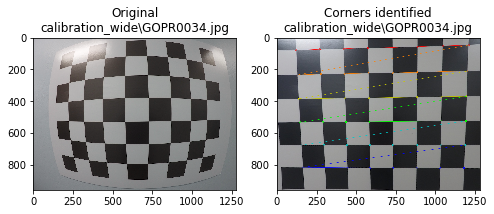

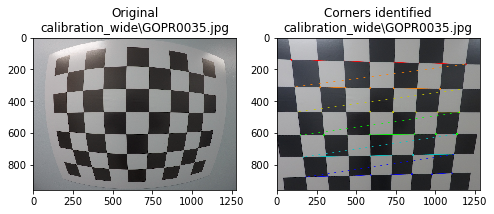

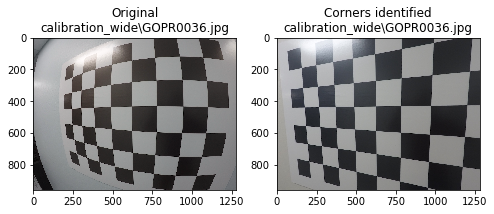

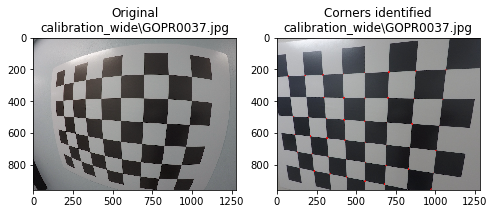

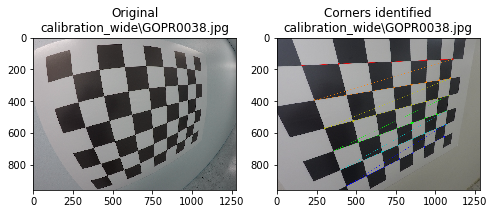

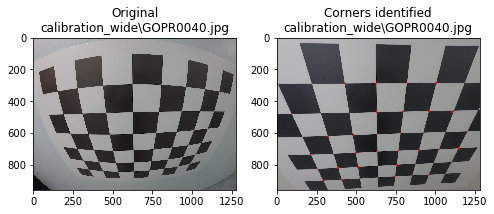

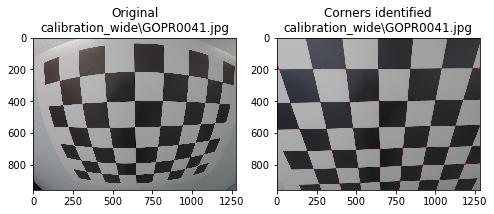

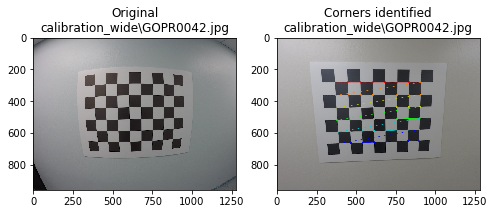

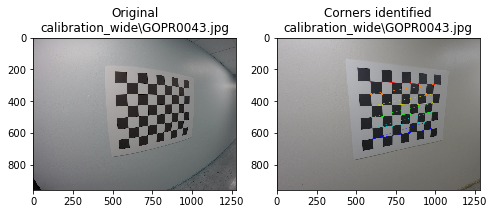

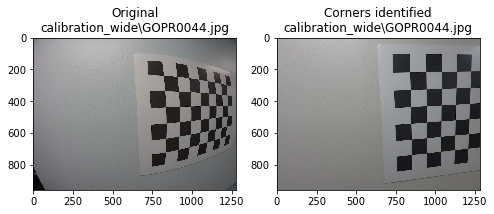

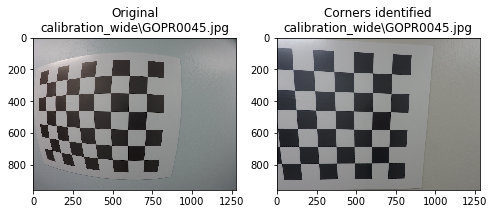

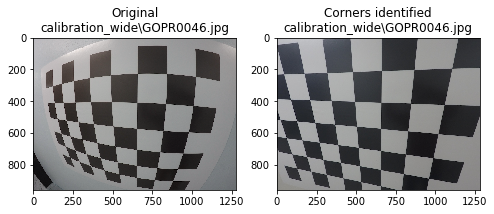

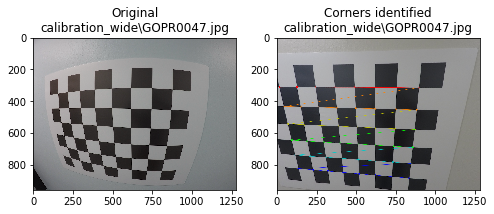

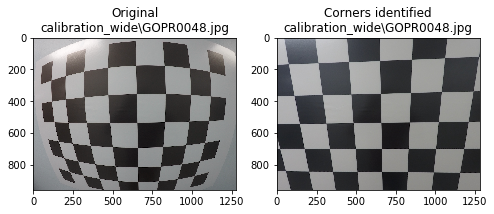

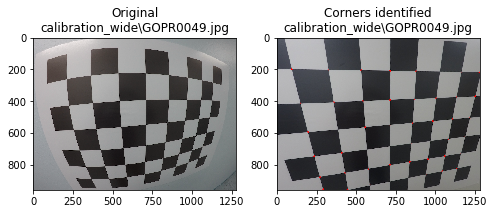

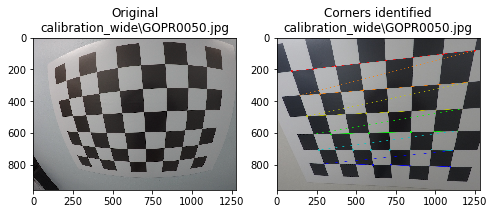

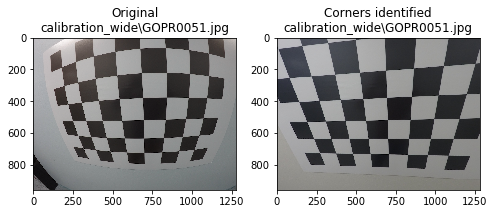

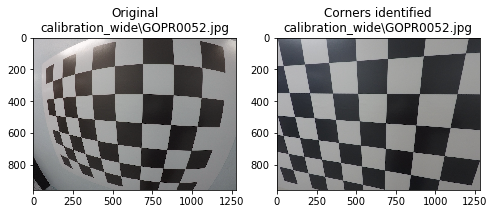

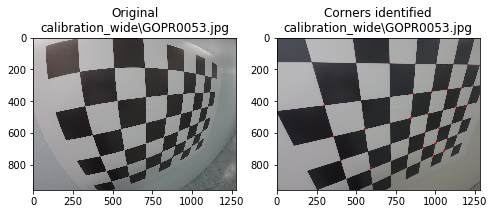

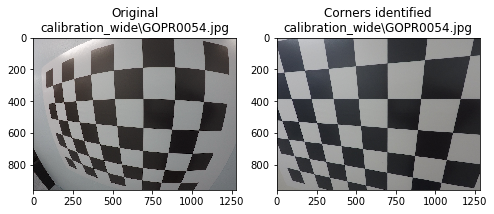

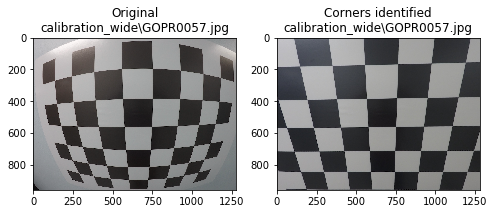

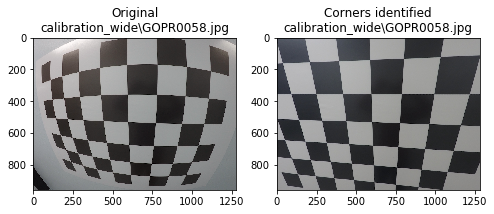

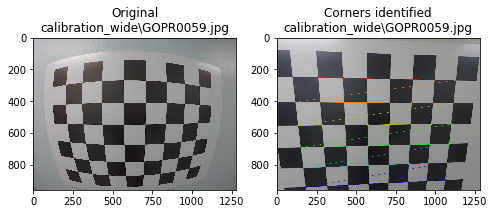

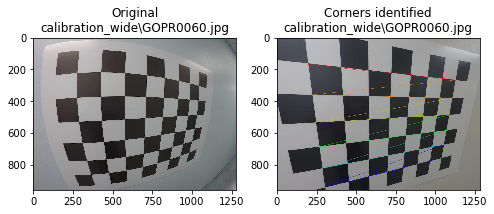

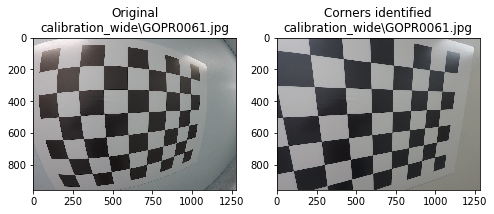

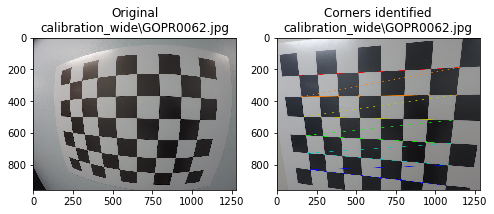

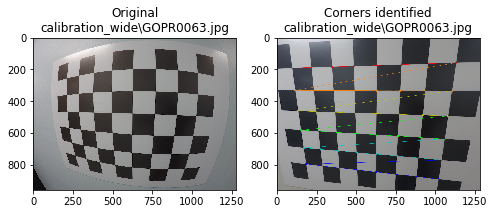

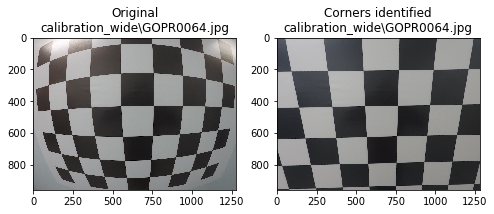

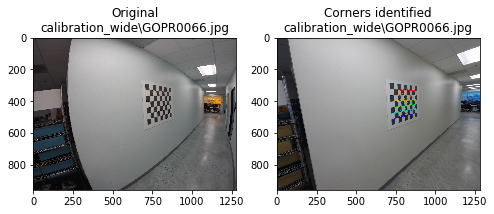

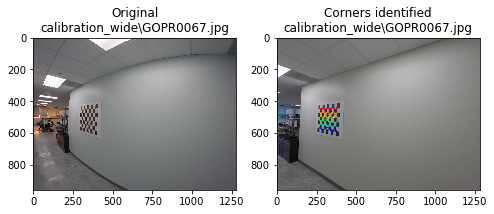

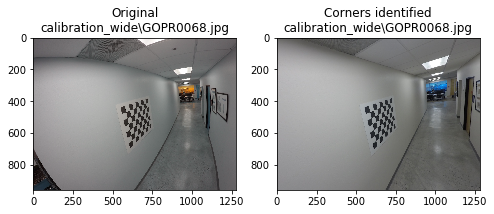

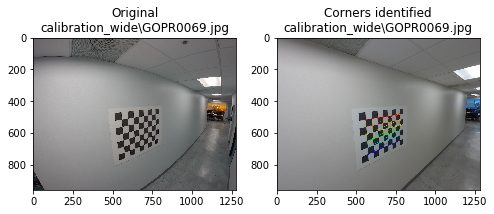

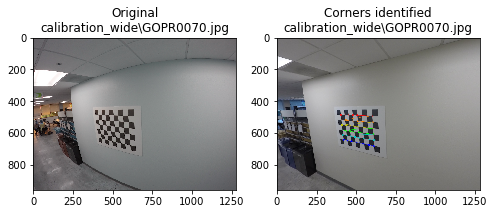

In [37]:
pattern_size = (8,6)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

obj_points = [] # 3d points in real world space.
img_points = [] # 2d points in image plane.


# Read all chessboard images
images = glob.glob('calibration_wide/GOP*.jpg')
images.sort()

# Iterate through images and calculate chessboard corners
for i, iname in enumerate(images):
    # Read the image
    img = cv2.imread(iname)

    # Convert image to Gray scale
    gray = tranformImageColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find chessboard corners and Calibrate
    identifyChessboardCorners(img, gray, iname, pattern_size)